# 二項分布は試行回数が増えると，どのような分布に近似されるか(2022/1/11)
---
## 概要
---
このnotebookでは，二項分布(binomial distribution)の概要と，この分布を近似する確率分布について記す．また，Pythonによるシミュレーションを通じて，性質の検証を行う．

要約は以下の通り：
- 二項分布は，コイン投げのような事象が2つしかない試行について，「n回中k回起こる確率」を考えた確率分布
- 試行回数，つまりnを大きくしていくと，二項分布は正規分布に近似される
- 試行回数nが大きく，かつ事象の発生確率pが小さい場合，二項分布はポアソン分布に近似される
- 二項分布を近似することで，計算コストを抑えた確率計算が可能になる

## ベルヌーイ試行
---
コイントスのように，結果が必ず2種類であり，何回繰り返しても確率が変わらない試行をベルヌーイ試行という．

コイントスで表が出る場合の確率変数を$X=1$とし，裏の場合の確率変数を$X=0$とする．確率変数の値は逆でも全く問題はないが，表の方が正例っぽいので，このように割り当てる．表の出る確率が$p=0.5$とするとき，表と裏の出る確率はそれぞれ以下のように表される：

$$
P(X=1) = p
$$

$$
P(X=0) = 1-p
$$

わざわざイメージしやすいものを小難しく扱っているようだが，これは以降の二項分布への伏線なので我慢してほしい．

## 二項分布
---
二項分布はベルヌーイ試行の確率をより一般化したものだと考えることができる．確率$p$で正例(例えばコイントスなら「表」のこと)が出現するベルヌーイ試行を$n$回行ったとき，このうち$k$回が正例である確率は以下のような二項分布で与えられる：

$$
P(X=k) = {}_nC_kp^k(1-p)^{n-k}
$$

ベルヌーイ試行で扱った確率変数$X$の値と，二項分布の確率変数$X$の値は異なる意味を持つことに注意する．ベルヌーイ試行の場合は単に「表・裏」を識別するための名義尺度であったが，二項分布の場合は「回数」を与えるものである．

定義に戻ると，これの意味することは独立試行の繰り返しに相当する．つまり「正例の出る確率は$p$で，これを$k$回反復したら，確率は$p^k$」というのと，「負例の出る確率は$(1-p)$で，これを残りの$(n-k)$回反復したら,確率は$(1-p)^{n-k}$」というものを掛け合わせたものになっている．

また，係数として与えられている${}_nC_k$が，組み合わせの数に相当する．正例と負例の出現する順番は1つではないから，様々な組み合わせで数えあげていることになる．例えばコイントスを3回する場合に，表が1回出るパターンは「表裏裏」「裏表裏」「裏裏表」の3通りある．

### 二項分布の平均
二項分布の平均，すなわち確率変数$X$の期待値は$np$で与えられる．つまり二項分布に従う試行を何度も繰り返すと，$k=np$に収束していくということである．例えばコイントスの場合，表裏が同様に確からしく現れるとしたら，「10回投げれば5回は表(裏)が出ることが一番多いよね」という直感的にも尤もらしいことを意味している．

導出は以下の通り：

\begin{eqnarray}
E[X] &=& \sum_{k=0}^{n}k{}_nC_kp^k(1-p)^{n-k} \\
&=& \sum_{k=0}^{n}k\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} \\
&=& \sum_{k=0}^{n}np\frac{(n-1)!}{(k-1)!(n-k)!}p^{k-1}(1-p)^{n-k} \\
&=& np\sum_{k=0}^{n}\frac{(n-1)!}{(k-1)!((n-1)-(k-1))!}p^{k-1}(1-p)^{n-k} \\
&=& np
\end{eqnarray}

最後の変形は，全ての場合を足すと確率は1になるので，これを利用している．$(n-1)$回試行した場合の確率の和である．

### 二項分布の分散
二項分布の分散は$np(1-p)$で与えられる．導出は以下：

\begin{eqnarray}
V[X] &=& E[X^2] - (E[X])^2 
\end{eqnarray}

$E[X]$は先に導出したので，$E[X^2]$を求める

\begin{eqnarray}
E[X^2] &=& \sum_{k=0}^{n}k^2{}_nC_kp^k(1-p)^{n-k} \\
&=& np\sum_{k=0}^{n}k{}_{n-1}C_{k-1}p^{k-1}(1-p)^{n-k} \\
&=& np\sum_{k=0}^{n-1}(k+1){}_{n-1}C_{k}p^{k}(1-p)^{n-k-1} \\
&=& np\left[\sum_{k=0}^{n-1}k{}_{n-1}C_{k}p^{k}(1-p)^{n-k-1} + \sum_{k=0}^{n-1}{}_{n-1}C_{k}p^{k}(1-p)^{n-k-1}\right] \\
&=& np\left[(n-1)p + 1\right] \\
&=& np(np - p + 1) \\
&=& (np)^2 + np(1-p)
\end{eqnarray}

ゆえに

\begin{eqnarray}
V[X] &=& (np)^2 + np(1-p) - (np) ^2 \\
&=& np(1-p)
\end{eqnarray}

### 正規分布との関連
二項分布は試行回数$n$を増やすと，正規分布に近似されることが知られている．つまり，$n$が十分に大きい場合，確率変数$X$はあたかも$X\sim N(np, np(1-p))$であるかのように振る舞う．

近似できることによるメリットとして，計算量の削減が挙げられる．二項分布の確率計算を地道に行うより，確率変数を標準化することで平均0，標準偏差1とすれば，標準正規分布表から直接確率値を求めることができる．

この性質については，末尾の「Pythonを用いたシミュレーション」の節で実際に検証していく．

### ポアソン分布との関連
先ほどは，試行回数$n$が十分大きい場合に，二項分布が正規分布に近似できると述べた．加えて，正例の発生確率$p$が十分に小さい場合，二項分布はポアソン分布に近似できる．

言い換えると，めったに起こらないような事象を扱う場合(例えば，交通事故)は，正規分布に近似するよりもポアソン分布で近似する方がより良い推定結果が得られるということになる．

ポアソン分布はパラメータとして平均$\lambda$をもち，ある期間において平均$\lambda$回起こる事象について，それが$k$回起こる確率を以下のように表す：

$$
P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}
$$

$e$はネイピア数である．

この性質についても，正規分布への近似と同様に末尾の「Pythonを用いたシミュレーション」の節で実際に検証していく．


## Pythonを用いたシミュレーション
---
### 二項分布の正規分布への近似

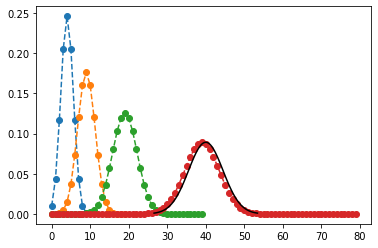

In [1]:
# コイン投げを想定してp=0.5として二項分布から確率を計算する
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 生起確率p
p = 0.5

# 試行回数
num_of_trials = [10, 20, 40, 80]

for num_of_trial in num_of_trials:
    probs = []
    for k in range(num_of_trial):
        # 直接組み合わせの数を求める関数がないようなので，
        # 階乗の関数を組み合わせて計算する
        prob = (math.factorial(num_of_trial)/(math.factorial(k+1)*math.factorial(num_of_trial - k - 1))) \
        * (p**(k+1))* ((1-p)**(num_of_trial - k - 1))
        probs.append(prob)
    plt.plot(probs, 'o--')


# ガウス分布も併せてプロットする
mu = num_of_trials[-1] * p
variance = num_of_trials[-1] * p * (1-p)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='black')

### 二項分布のポアソン分布への近似

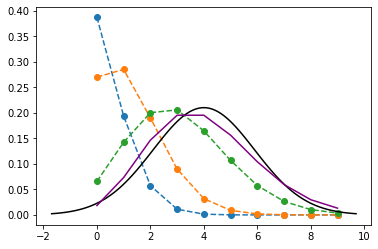

In [2]:
# 生起確率を小さくして，同様のシミュレーションを行う
p = 0.1

# 試行回数
num_of_trials = [10, 20, 40]

for num_of_trial in num_of_trials:
    probs = []
    for k in range(num_of_trial):
        prob = (math.factorial(num_of_trial)/(math.factorial(k+1)*math.factorial(num_of_trial - k - 1))) \
        * (p**(k+1))* ((1-p)**(num_of_trial - k - 1))
        probs.append(prob)
    plt.plot(probs[:10], 'o--')


# (参考までに)ガウス分布も併せてプロットする
mu = num_of_trials[-1] * p
variance = num_of_trials[-1] * p * (1-p)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='black')

# ポアソン分布をプロットする
probs = []
mu = num_of_trials[-1] * p
for k in range(num_of_trials[-1]):
    probs.append(stats.poisson.pmf(k, mu))
plt.plot(probs[:10], color='purple')

## 参考文献
---
[13-1.二項分布，統計WEB](https://bellcurve.jp/statistics/course/6979.html)

[二項分布，Wikipedia](https://ja.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83)

[二項分布とは？わかりやすく正規分布との違いや近似できる問題も例を踏まえて，いちばんやさしい、医療統計](https://best-biostatistics.com/contingency/binomial.html)

[３二項分布と正規分布](https://www.kwansei.ac.jp/hs/z90010/sugakuc/toukei/norbin/norbin.htm)

[二項分布のわかりやすいまとめ，AVIEN AI Trend](https://ai-trend.jp/basic-study/binomial-distribution/binomial-distribution/)

[2項分布の平均と分散](https://www1.doshisha.ac.jp/~kmiyazaw/undergraduate/binary_distribution.pdf)

[13-3.ポアソン分布，統計WEB](https://bellcurve.jp/statistics/course/6984.html)

[ポアソン分布，Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83)

[math.factorial，Python 3.10.0b2ドキュメント](https://docs.python.org/ja/3/library/math.html)

[scipy.stats.norm，Scipy v1.7.1](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html)

[scipy.stats.poisson，Scipy v1.7.1](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.poisson.html)
